In [43]:
pip install pandas seaborn matplotlib scikit-learn

  Using cached scikit_learn-1.5.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp313-cp313-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp313-cp313-macosx_14_0_arm64.whl (23.1 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


combines both files

In [52]:
df = pd.read_csv('data.csv')
df.head(500)

filename       tempo  beats  chroma_stft      rmse  \
0        pop.00024.au  117.453835     57     0.410990  0.207584   
1        pop.00099.au   78.302557     38     0.360462  0.138195   
2        pop.00009.au  107.666016     50     0.454810  0.159711   
3        pop.00078.au  103.359375     52     0.454698  0.223419   
4        pop.00037.au  103.359375     51     0.451668  0.240985   
..                ...         ...    ...          ...       ...   
495  country.00024.au  129.199219     62     0.270330  0.096629   
496  country.00036.au  112.347147     56     0.344660  0.022725   
497  country.00065.au  123.046875     60     0.282868  0.110603   
498  country.00038.au  151.999081     76     0.367296  0.090958   
499  country.00025.au   73.828125     34     0.347253  0.079920   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          3301.781785         3175.656592  7302.597509            0.144527   
1          2765.747194         3222.713605  6873.391771            0.096015   
2          3279.877315         3026.391118  6953.099622            0.172819   
3          3124.176350         2970.320532  6618.134981            0.142721   
4          3236.413205         2953.596262  6698.776160            0.164825   
..                 ...                 ...          ...                 ...   
495        1739.375804         1907.402451  3425.629286            0.082460   
496        1826.924934         2050.394029  3646.994614            0.084825   
497         894.186247         1195.410065  1638.990089            0.038681   
498        2860.295766         2919.888398  6247.020558            0.121158   
499        1565.431223         2016.069774  3188.930717            0.057303   

          mfcc1  ...    mfcc12    mfcc13    mfcc14    mfcc15     mfcc16  \
0    -40.802069  ... -0.568772  0.552448 -1.981371  1.915755   0.076505   
1   -119.320605  ...  1.566938 -2.932391 -1.609138 -0.200545  -2.429376   
2    -35.277026  ... -0.518891  0.212918 -1.294660 -0.105626  -1.245879   
3    -42.757179  ...  3.020176 -1.242321 -3.524069 -0.325165  -1.443294   
4      4.821123  ...  1.753352  3.336132  2.352307  1.428845  -0.604926   
..          ...  ...       ...       ...       ...       ...        ...   
495 -199.969637  ...  4.981245 -4.977015 -6.045910 -0.694290  -8.536434   
496 -339.794049  ... -2.883340 -6.157088 -1.850731 -5.354363  -8.309541   
497 -250.859958  ...  1.815571 -8.761907 -7.048016 -4.219176  -8.838670   
498 -118.013918  ... -1.122174  2.441451 -1.423066 -4.742861  -6.376284   
499 -200.552736  ... -2.467951 -6.048296 -0.800009 -4.699653 -11.293138   

        mfcc17    mfcc18    mfcc19    mfcc20    label  
0    -1.270496  1.233082  1.493700  0.949931        1  
1     1.207988  5.848729  1.609469  7.580263        1  
2    -2.528455  0.571032  1.569434 -1.724873        1  
3    -1.864617 -0.031307 -0.729631 -0.987611        1  
4    -2.185691 -1.602394 -0.612146 -4.050126        1  
..         ...       ...       ...       ...      ...  
495  -8.453808 -7.926132 -7.603389 -0.388070  country  
496 -10.727866 -7.735629 -3.439420 -6.959964  country  
497  -7.403172 -3.300412 -5.141628 -9.969669  country  
498  -5.753704 -6.265547 -4.510278 -1.000420  country  
499  -8.870809 -8.073558 -3.161044  0.330751  country  

[500 rows x 30 columns]

## cleaning data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Remove rows with null values
df_cleaned = df.dropna()

# create a genre column with clean genre names from the filename
df_cleaned['genre'] = df_cleaned['filename'].apply(lambda x: x.split('.')[0])

# Move the genre column to  first position
cols = df_cleaned.columns.tolist()
cols = [cols[-1]] + cols[:-1]
df_cleaned = df_cleaned[cols]

#remove the filename column
df_cleaned = df_cleaned.drop(columns=['filename'])



# Label encode the genre column by converting the genre names to integers and replacing the label column
label_encoder = LabelEncoder()
df_cleaned['label'] = label_encoder.fit_transform(df_cleaned['genre'])

#turn the data types in the label column to int
df_cleaned['label'] = df_cleaned['label'].astype(int)

# Get the mapping of labels to integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print(label_mapping)

df_cleaned.head(300)




{'blues': np.int64(0), 'classical': np.int64(1), 'country': np.int64(2), 'disco': np.int64(3), 'hiphop': np.int64(4), 'jazz': np.int64(5), 'metal': np.int64(6), 'pop': np.int64(7), 'reggae': np.int64(8), 'rock': np.int64(9)}


In [69]:
df_cleaned['label'] = df_cleaned['label'].astype(int)

In [71]:
column_names = df_cleaned.columns.tolist()
print(df_cleaned.dtypes)

genre                  object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                   int64
dtype: object


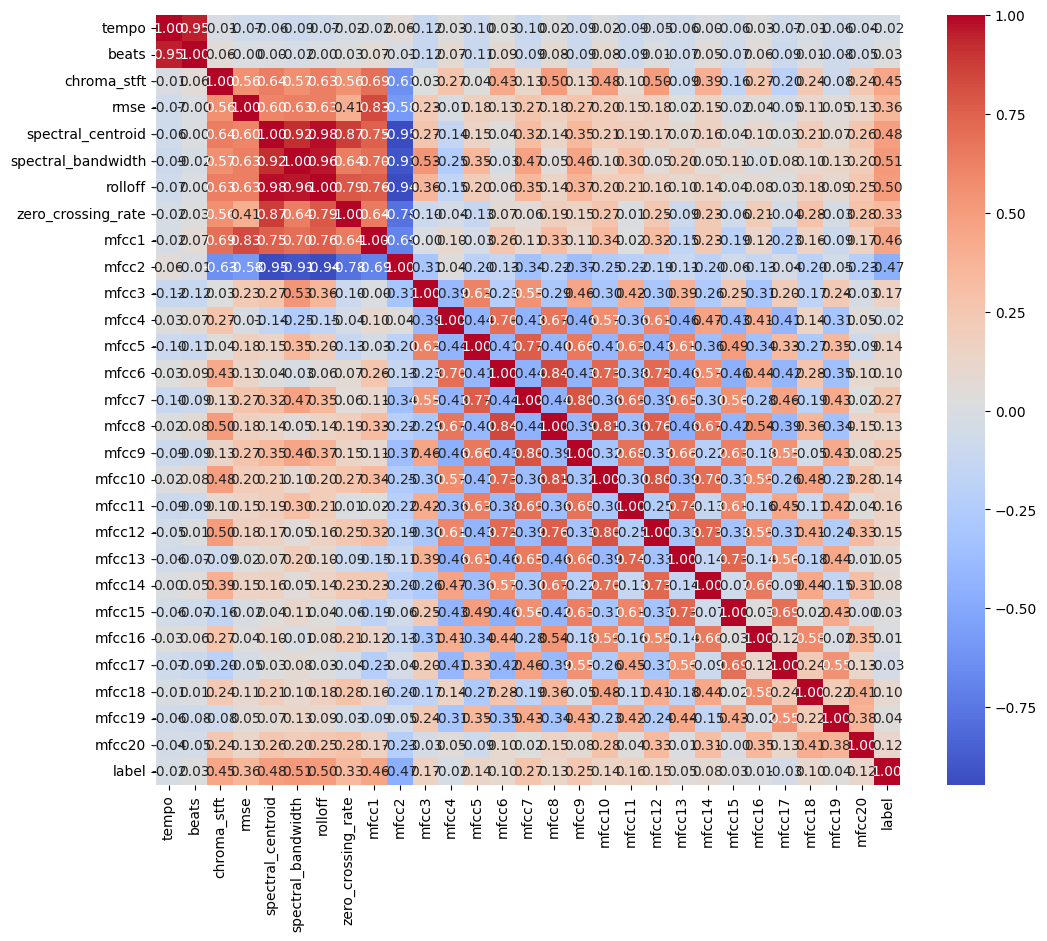

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'genre' column
df_cleaned_no_genre = df_cleaned.drop(columns=['genre'])

# Visualize the correlation matrix of df_cleaned_no_genre using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned_no_genre.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Correlated values to label are:
- 'chroma_stft'
- 'rmse'
- 'spectral_centroid'
- 'spectral_bandwidth'
- 'rolloff'
- 'zero_crossing_rate'
- 'label'

## visualize the relationships between the selected columns

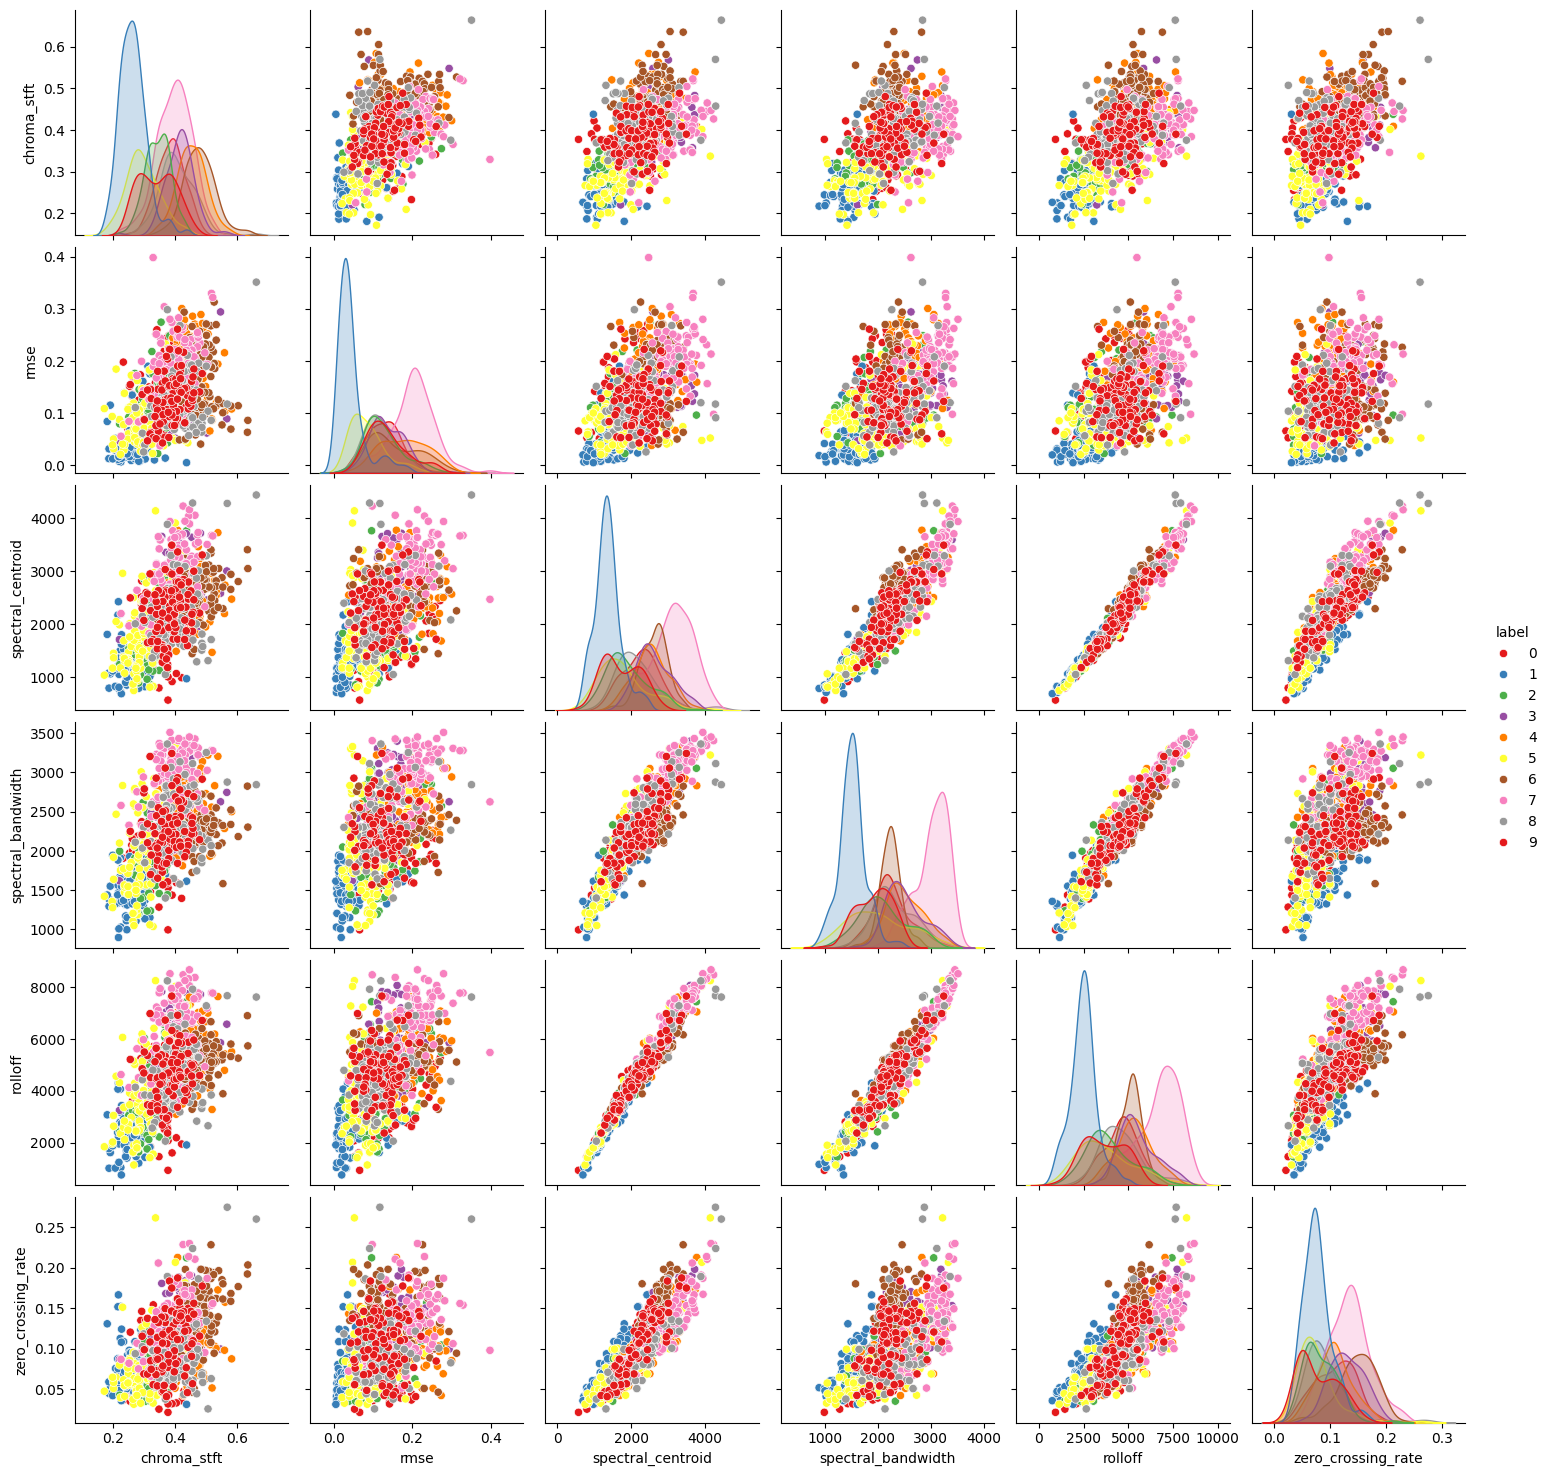

/var/folders/6p/q4yz4rxx4p9970b08hk65d0m0000gn/T/ipykernel_29047/4245740169.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=df_cleaned, palette='Set1')


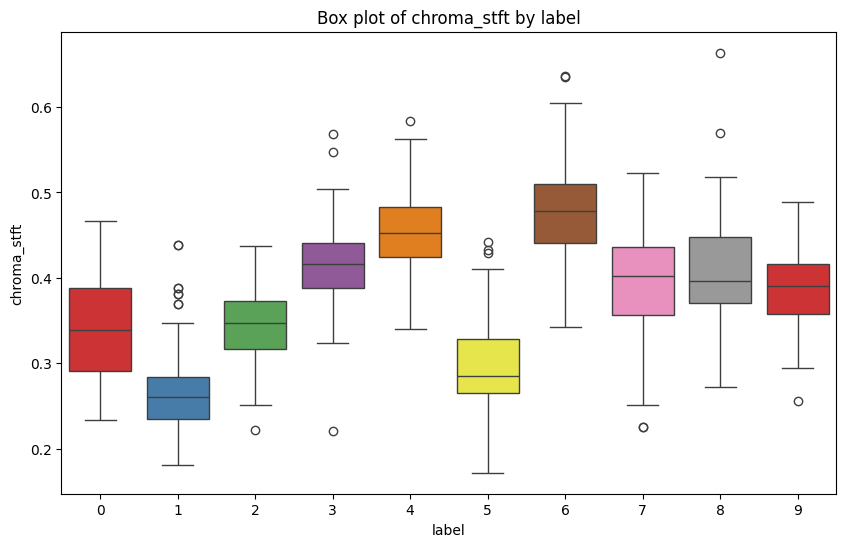

/var/folders/6p/q4yz4rxx4p9970b08hk65d0m0000gn/T/ipykernel_29047/4245740169.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=df_cleaned, palette='Set1')


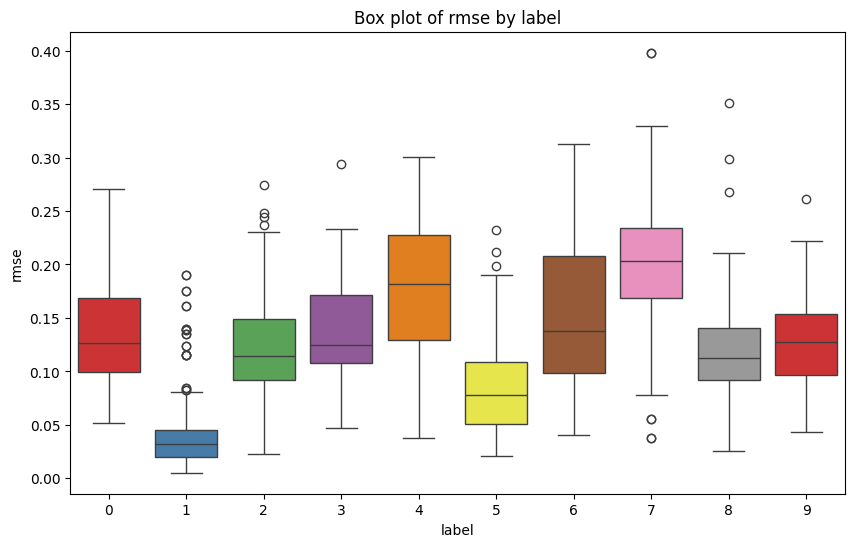

/var/folders/6p/q4yz4rxx4p9970b08hk65d0m0000gn/T/ipykernel_29047/4245740169.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=df_cleaned, palette='Set1')


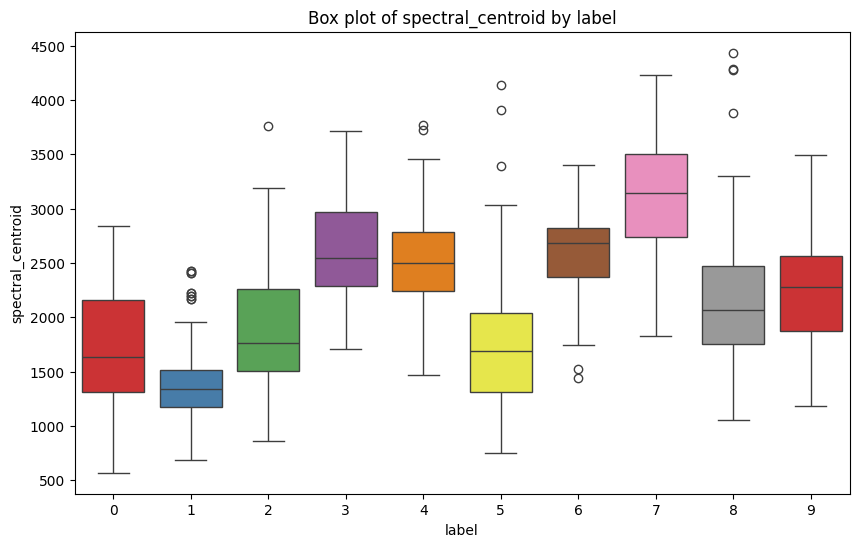

/var/folders/6p/q4yz4rxx4p9970b08hk65d0m0000gn/T/ipykernel_29047/4245740169.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=df_cleaned, palette='Set1')


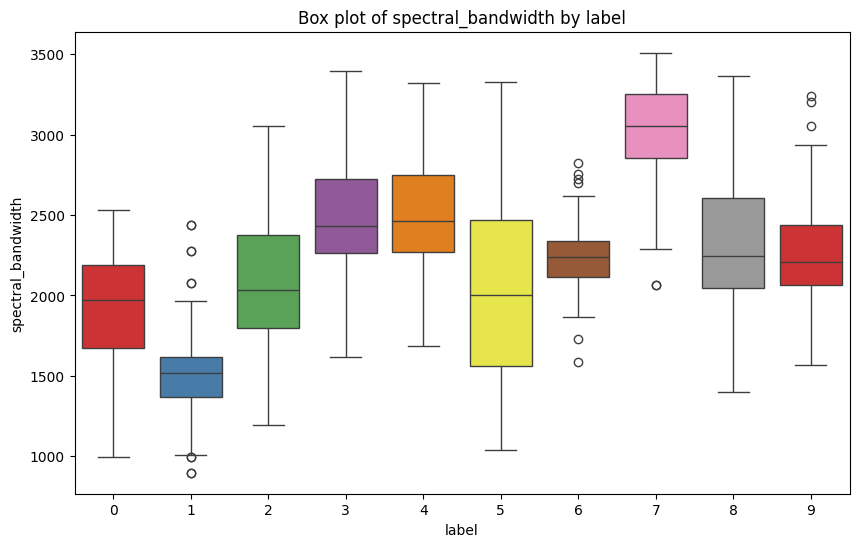

/var/folders/6p/q4yz4rxx4p9970b08hk65d0m0000gn/T/ipykernel_29047/4245740169.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=df_cleaned, palette='Set1')


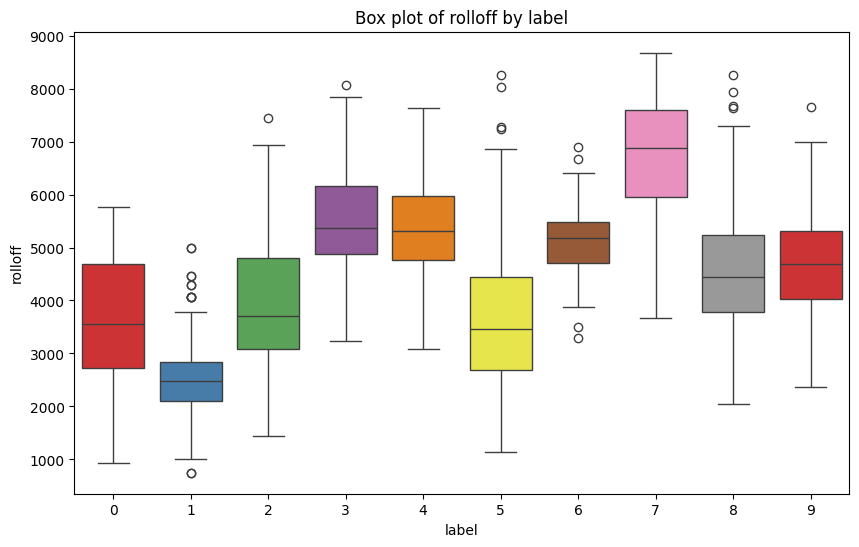

/var/folders/6p/q4yz4rxx4p9970b08hk65d0m0000gn/T/ipykernel_29047/4245740169.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=df_cleaned, palette='Set1')


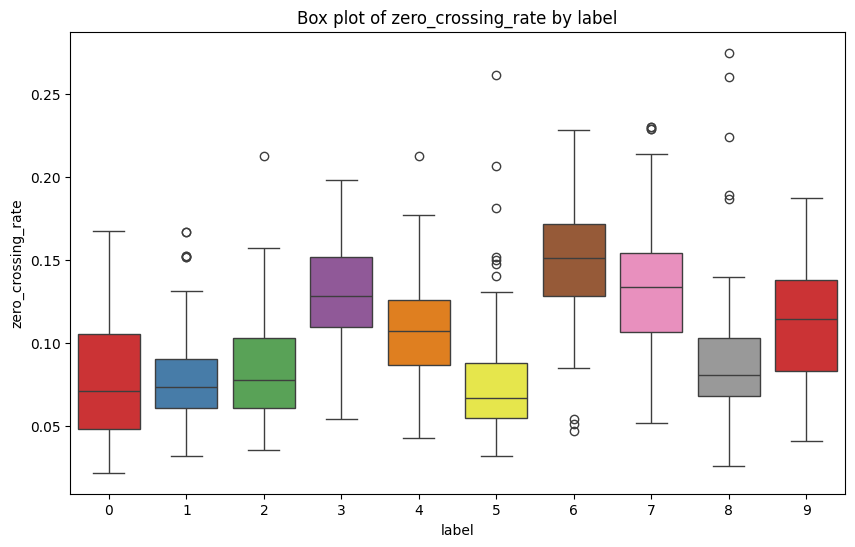

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select the columns to visualize
columns_to_visualize = ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'label']

# Create a pair plot to visualize the correlation between features
sns.pairplot(df_cleaned[columns_to_visualize], hue='label', palette='Set1')
plt.show()

# Create box plots to see distribution of each feature with respect to label
for column in columns_to_visualize[:-1]:  # Exclude the 'label' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=column, data=df_cleaned, palette='Set1')
    plt.title(f'Box plot of {column} by label')
    plt.show()

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

selected_features = ['chroma_stft', 'spectral_centroid', 'spectral_bandwidth', 'zero_crossing_rate', 'mfcc13', 'mfcc15']

# Extract  features and labels
X = df_cleaned[selected_features]
y = df_cleaned['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training/testing 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier()

# Perform cross-validation to find the optimal number of neighbors
k_values = range(1, 21)
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean() for k in k_values]

# print the k value with the highest cross-validation score
best_k = k_values[np.argmax(cv_scores)]
print(f'The best value of k is {best_k}')

The best value of k is 13


In [83]:

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = knn.score(X_test, y_test)
print(f'Test set accuracy: {accuracy}')

Test set accuracy: 0.5958333333333333


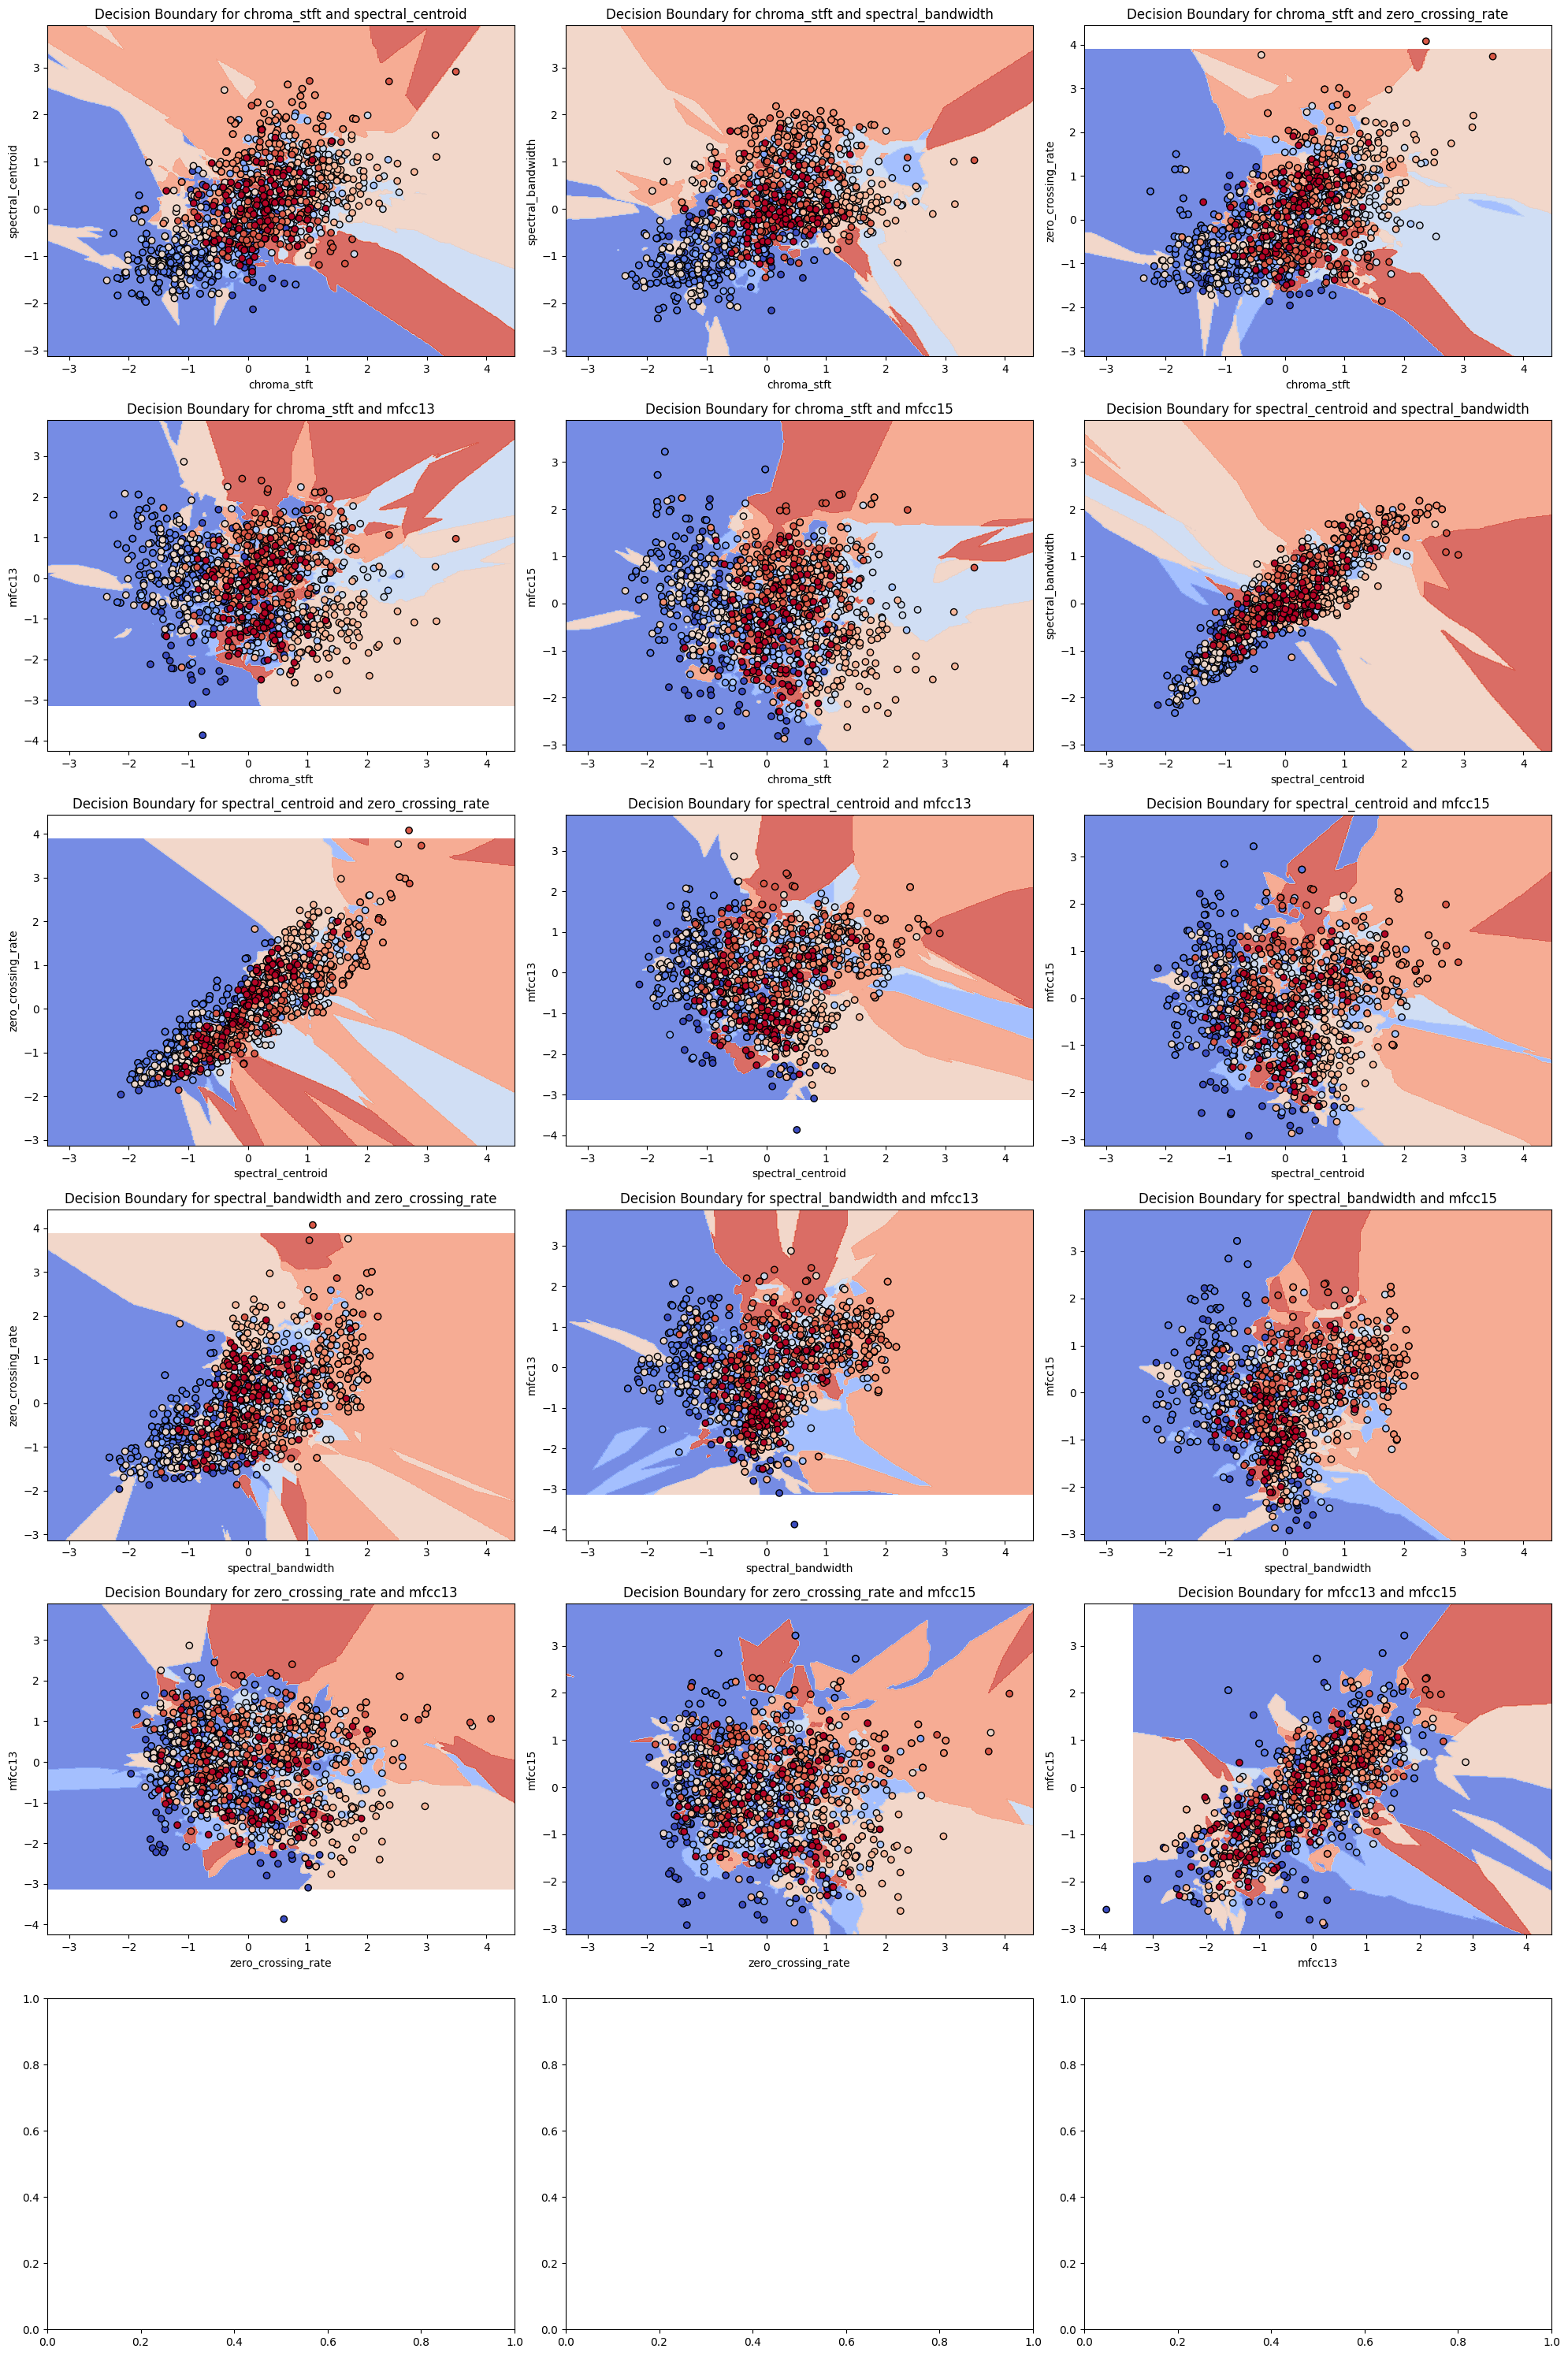

In [88]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary for all pairs of features
feature_pairs = [(i, j) for i in range(X_scaled.shape[1]) for j in range(i + 1, X_scaled.shape[1])]

fig, axes = plt.subplots(len(feature_pairs) // 3 + 1, 3, figsize=(20, len(feature_pairs) * 2))

for idx, (i, j) in enumerate(feature_pairs):
    ax = axes[idx // 3, idx % 3]
    X_pair = X_scaled[:, [i, j]]
    knn.fit(X_pair, y)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X_pair[:, 0], X_pair[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_xlabel(selected_features[i])
    ax.set_ylabel(selected_features[j])
    ax.set_title(f'Decision Boundary for {selected_features[i]} and {selected_features[j]}')

plt.tight_layout()
plt.show()

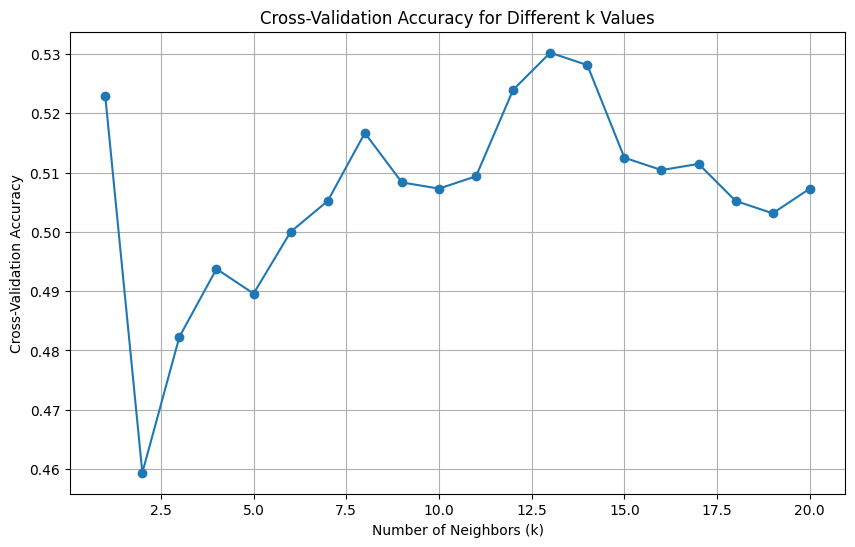

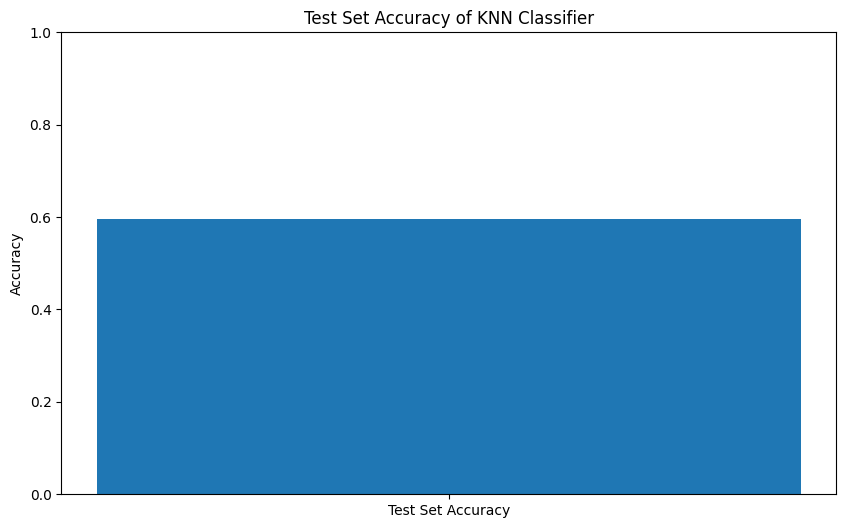

In [75]:
import matplotlib.pyplot as plt

# Plot the cross-validation scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different k Values')
plt.grid(True)
plt.show()

# Plot the accuracy of the KNN classifier on the test set
plt.figure(figsize=(10, 6))
plt.bar(['Test Set Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Test Set Accuracy of KNN Classifier')
plt.show()

# conclusion model is shit lol